In [11]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt
# Import pandas
import pandas as pd
# Import geopandas
import geopandas as gpd
# import Folium
import folium
import shapely.geometry
from shapely.ops import nearest_points

In [53]:
# Path de nuestro shapefile
shapefile_path = 'DATASET/Puntos de accidentes de peatones/accidentado_peaton.shp'
# Leemos el archivo
accidentesDF = gpd.read_file(shapefile_path)
# Mostramos el contenido de las primeras 10 filas
accidentesDF.head(10)

no_folio  fecha_even ano_evento    mes   hora  condicion   tipo_de_ev  \
0   907989  2019-01-02       2019  Enero  11:50  LESIONADO  ATROPELLADO   
1   908022  2019-01-02       2019  Enero  12:10  LESIONADO  ATROPELLADO   
2   908624  2019-01-02       2019  Enero  19:34  LESIONADO  ATROPELLADO   
3   909560  2019-01-03       2019  Enero  10:43  LESIONADO  ATROPELLADO   
4   910320  2019-01-03       2019  Enero  18:55  LESIONADO  ATROPELLADO   
5   910555  2019-01-03       2019  Enero  21:15  LESIONADO  ATROPELLADO   
6   911267  2019-01-04       2019  Enero  10:19  LESIONADO  ATROPELLADO   
7   911767  2019-01-04       2019  Enero  15:02  LESIONADO  ATROPELLADO   
8   911929  2019-01-04       2019  Enero  16:35  LESIONADO  ATROPELLADO   
9   912091  2019-01-04       2019  Enero  18:22  LESIONADO  ATROPELLADO   

   coordenada  coordena_1                 punto_1  ... unidad_med lugar_del_  \
0  -99.166351   19.424351               EJE 2 PTE  ...  CRUZ ROJA       None   
1  -99.184913   19.353420                 ENCANTO  ...       ERUM       None   
2  -99.142656   19.440867            PEDRO MORENO  ...       ERUM       None   
3  -99.162602   19.442526  AV RIBERA DE SAN COSME  ...  CRUZ ROJA       None   
4  -99.175454   19.384282          AV INSURGENTES  ...       ERUM       None   
5  -99.296998   19.356264               AV JUAREZ  ...  CRUZ ROJA       None   
6  -99.129635   19.435443            JUSTO SIERRA  ...       ERUM       None   
7  -99.211417   19.331075         AV SAN JERONIMO  ...       ERUM       None   
8  -99.173178   19.431677                   RENAN  ...       ERUM       None   
9  -99.125901   19.423485               EJE 1 OTE  ...       ERUM       None   

  trasladado             hospital         dia hora2 prioridad observacio  \
0        0.0                 None  miÃ©rcoles  11.0      BAJA       None   
1        1.0              OBREGON  miÃ©rcoles  12.0     MEDIA       None   
2        0.0                 None  miÃ©rcoles  19.0      BAJA       None   
3        0.0                 None      jueves  10.0      BAJA       None   
4        1.0        SAN ANGEL INN      jueves  18.0     MEDIA       None   
5        0.0                 None      jueves  21.0      BAJA       None   
6        0.0                 None     viernes  10.0      BAJA       None   
7        1.0              ANGELES     viernes  15.0     MEDIA       None   
8        1.0  TORRE MEDICA CENTRO     viernes  16.0     MEDIA       None   
9        0.0                 None     viernes  18.0      BAJA       None   

     ID                    geometry  
0   1.0  POINT (-99.16635 19.42435)  
1   2.0  POINT (-99.18491 19.35342)  
2   3.0  POINT (-99.14266 19.44087)  
3   4.0  POINT (-99.16260 19.44253)  
4   5.0  POINT (-99.17545 19.38428)  
5   6.0  POINT (-99.29700 19.35626)  
6   7.0  POINT (-99.12963 19.43544)  
7   8.0  POINT (-99.21142 19.33107)  
8   9.0  POINT (-99.17318 19.43168)  
9  10.0  POINT (-99.12590 19.42348)  

[10 rows x 38 columns]

In [54]:
# Print info
print('Tipo de datos')
print(type(accidentesDF))

print('Columnas del shape')
print(accidentesDF.columns)

print('Geoseries')
print(type(accidentesDF.geometry))

print('CRS')
print(accidentesDF.crs)
# Change the CRS to EPSG:4326
accidentesDF = accidentesDF.to_crs(epsg=4326)
print(accidentesDF.crs)

print('SHAPE')
print(accidentesDF.shape)

print('Info')
print(accidentesDF.info())

Tipo de datos
<class 'geopandas.geodataframe.GeoDataFrame'>
Columnas del shape
Index(['no_folio', 'fecha_even', 'ano_evento', 'mes', 'hora', 'condicion',
       'tipo_de_ev', 'coordenada', 'coordena_1', 'punto_1', 'punto_2',
       'colonia', 'alcaldia', 'tipo_de_ve', 'tipo_de__1', 'tipo_de__2',
       'tipo_de__3', 'marca_de_v', 'marca_de_1', 'marca_de_2', 'marca_de_3',
       'lesiones', 'edad_lesio', 'total_occi', 'occisos_fe', 'occisos_ma',
       'total_lesi', 'identidad', 'unidad_med', 'lugar_del_', 'trasladado',
       'hospital', 'dia', 'hora2', 'prioridad', 'observacio', 'ID',
       'geometry'],
      dtype='object')
Geoseries
<class 'geopandas.geoseries.GeoSeries'>
CRS
epsg:4326
epsg:4326
SHAPE
(3971, 38)
Info
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3971 entries, 0 to 3970
Data columns (total 38 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   no_folio    3971 non-null   object  
 1   fecha_even  3971 non-nu

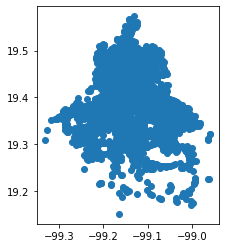

In [4]:
# Plot del GeoDataFrame
accidentesDF.plot(legend=True)
plt.show()

In [5]:
m = accidentesDF.explore(
    column="tipo_de_ev",
    tooltip="tipo_de_ev", # show "BoroName" value in tooltip (on hover)
    popup=True, # show all values in popup (on click)
    tiles="CartoDB positron", # use "CartoDB positron" tiles matplotlib colormap
)
m

In [6]:
m.save("D:\\Workspace\\ws_python\\semovi\\puntos_accidentes\\index.html")

In [8]:
df = accidentesDF[accidentesDF.alcaldia.isin(['ALVARO OBREGON', 'TLALPAN'])]

In [9]:
df

no_folio  fecha_even ano_evento        mes   hora  condicion  \
1      908022  2019-01-02       2019      Enero  12:10  LESIONADO   
11     913456  2019-01-05       2019      Enero  12:09  LESIONADO   
30     925459  2019-01-11       2019      Enero  21:21  LESIONADO   
35     929840  2019-01-14       2019      Enero   8:48  LESIONADO   
46     941420  2019-01-20       2019      Enero  21:38  LESIONADO   
...       ...         ...        ...        ...    ...        ...   
3915  2301501  2019-12-18       2019  Diciembre  16:40  LESIONADO   
3919  2306819  2019-12-20       2019  Diciembre  12:51  LESIONADO   
3935  2316766  2019-12-23       2019  Diciembre   9:00  LESIONADO   
3939  2320229  2019-12-24       2019  Diciembre  12:36  LESIONADO   
3964  2337578  2019-12-29       2019  Diciembre  17:58  LESIONADO   

       tipo_de_ev  coordenada  coordena_1                     punto_1  ...  \
1     ATROPELLADO  -99.184913   19.353420                     ENCANTO  ...   
11    ATROPELLADO  -99.232829   19.383610         AV VASCO DE QUIROGA  ...   
30    ATROPELLADO  -99.186908   19.349202              AV INSURGENTES  ...   
35    ATROPELLADO  -99.232925   19.366801          AV PUERTO MAZATLAN  ...   
46    ATROPELLADO  -99.156173   19.206354  CARR FED MEXICO CUERNAVACA  ...   
...           ...         ...         ...                         ...  ...   
3915  ATROPELLADO  -99.199932   19.333663             AV SAN JERONIMO  ...   
3919  ATROPELLADO  -99.225489   19.349212         CALZ DE LAS AGUILAS  ...   
3935  ATROPELLADO  -99.199699   19.333769                  EJE 10 SUR  ...   
3939  ATROPELLADO  -99.231302   19.358018                     CALLE 3  ...   
3964  ATROPELLADO  -99.188656   19.396887        MARTIRES DE TACUBAYA  ...   

     unidad_med lugar_del_ trasladado            hospital         dia hora2  \
1          ERUM       None        1.0             OBREGON  miÃ©rcoles  12.0   
11         ERUM       None        0.0                None     sÃ¡bado  12.0   
30    CRUZ ROJA       None        1.0             POLANCO     viernes  21.0   
35         ERUM       None        1.0  MEDICAL DE TLALPAN       lunes   8.0   
46         ERUM       None        0.0                None     domingo  21.0   
...         ...        ...        ...                 ...         ...   ...   
3915  CRUZ ROJA       None        1.0           CRUZ ROJA  miÃ©rcoles  16.0   
3919       SUMA       None        1.0       SAN ANGEL INN     viernes  12.0   
3935  CRUZ ROJA       None        0.0                None       lunes   9.0   
3939         PC       None        0.0                None      martes  12.0   
3964  CRUZ ROJA       None        0.0                None     domingo  17.0   

     prioridad                 observacio      ID                    geometry  
1        MEDIA                       None     2.0  POINT (-99.18491 19.35342)  
11        BAJA                       None    12.0  POINT (-99.23283 19.38361)  
30       MEDIA                       None    31.0  POINT (-99.18691 19.34920)  
35       MEDIA                       None    36.0  POINT (-99.23292 19.36680)  
46        BAJA                       None    47.0  POINT (-99.15617 19.20635)  
...        ...                        ...     ...                         ...  
3915     MEDIA                       None  3916.0  POINT (-99.19993 19.33366)  
3919     MEDIA                       None  3920.0  POINT (-99.22549 19.34921)  
3935      BAJA                       None  3936.0  POINT (-99.19970 19.33377)  
3939      BAJA  CAMION QUE TRANSPORTA GAS  3940.0  POINT (-99.23130 19.35802)  
3964      BAJA  CAMION DE 3 1/2 TONELADAS  3965.0  POINT (-99.18866 19.39689)  

[453 rows x 38 columns]

In [10]:
m2 = df.explore(
    column="tipo_de_ev",
    tooltip="tipo_de_ev", # show "BoroName" value in tooltip (on hover)
    popup=True, # show all values in popup (on click)
    tiles="CartoDB positron", # use "CartoDB positron" tiles matplotlib colormap
)
m2

In [49]:
# Vamos por nuestros datos
df = pd.read_csv('DATASET/recorrido_2.csv')

# Acomodamos los datos
df.Coordenadas =  df.Coordenadas.str.strip('()')
df[['Latitude', 'Longitude']] = df.Coordenadas.str.split(',', expand=True)
df.Costo =  df.Costo.str.strip('$')
# Casteamos los datos al tipo de dato
df = df.astype({'Longitude': float, 'Latitude': float, 'Costo': float})

# Eliminamos la columna Coordenadas
df = df.drop('Coordenadas', axis=1)
df = df.drop('Coordenadas de Accidente', axis=1)
df = df.drop('Tipo Accidente', axis=1)
df = df.drop('Descripcion Accidente', axis=1)
# El resultado
df.head()

Tipo Transporte Tiempo  Costo   Latitude  Longitude
0         CAMINAR  05:30    0.0  19.383083 -99.190627
1         CAMINAR  05:33    0.0  19.383670 -99.190714
2         CAMINAR  05:40    0.0  19.382961 -99.184162
3         CAMINAR  05:43    0.0  19.383778 -99.183752
4         CAMINAR  05:48    0.0  19.382706 -99.181376

In [50]:
# Pasamos la informacion a un GeoDataframe
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude), crs ="EPSG:4326")

gdf['loc'] = gdf.geometry.apply(lambda x:shapely.geometry.mapping(x))

In [51]:
m = gdf.explore(tiles="CartoDB positron")
folium.PolyLine(gdf[['Latitude','Longitude']].values.tolist(), color="purple", weight=2.5, opacity=1).add_to(m)
m

In [55]:
from shapely.ops import nearest_points


pts3 = accidentesDF.geometry.unary_union
def near(point, pts=pts3):
    # find the nearest point and return the corresponding Place value
    nearest = (accidentesDF.geometry == nearest_points(point, pts)[1])
    nearest = nearest.index[nearest == True].tolist()
    return accidentesDF.loc[nearest].iloc[0]
# gdf['Nearest'] = gdf.apply(lambda row: near(row.geometry), axis=1)
result = [] # gpd.GeoDataFrame(columns=accidentesDF.columns.tolist())
for index, row in gdf.iterrows():
    item = near(row.geometry)
    # print(item)
    result.append(item.values)

gpdf2 = gpd.GeoDataFrame(result,columns=accidentesDF.columns.tolist())
gpdf2.head()

no_folio  fecha_even ano_evento         mes  hora  condicion   tipo_de_ev  \
0  1987391  2019-09-16       2019  Septiembre  4:54  LESIONADO  ATROPELLADO   
1  1987391  2019-09-16       2019  Septiembre  4:54  LESIONADO  ATROPELLADO   
2   996318  2019-02-17       2019     Febrero  9:42  LESIONADO  ATROPELLADO   
3   996318  2019-02-17       2019     Febrero  9:42  LESIONADO  ATROPELLADO   
4   996318  2019-02-17       2019     Febrero  9:42  LESIONADO  ATROPELLADO   

   coordenada  coordena_1            punto_1  ... unidad_med lugar_del_  \
0  -99.190765   19.385271  ANILLO PERIFERICO  ...  CRUZ ROJA       None   
1  -99.190765   19.385271  ANILLO PERIFERICO  ...  CRUZ ROJA       None   
2  -99.183645   19.383826     AV PATRIOTISMO  ...       ERUM       None   
3  -99.183645   19.383826     AV PATRIOTISMO  ...       ERUM       None   
4  -99.183645   19.383826     AV PATRIOTISMO  ...       ERUM       None   

  trasladado hospital      dia hora2 prioridad observacio      ID  \
0        2.0  POLANCO    lunes   4.0     MEDIA       None  3427.0   
1        2.0  POLANCO    lunes   4.0     MEDIA       None  3427.0   
2        0.0     None  domingo   9.0      BAJA       None   112.0   
3        0.0     None  domingo   9.0      BAJA       None   112.0   
4        0.0     None  domingo   9.0      BAJA       None   112.0   

                     geometry  
0  POINT (-99.19076 19.38527)  
1  POINT (-99.19076 19.38527)  
2  POINT (-99.18364 19.38383)  
3  POINT (-99.18364 19.38383)  
4  POINT (-99.18364 19.38383)  

[5 rows x 38 columns]

In [56]:
m2 = gpdf2.explore(
    m=m,
    column="tipo_de_ev",
    tooltip="tipo_de_ev", # show "BoroName" value in tooltip (on hover)
    popup=True, # show all values in popup (on click)
    tiles="CartoDB positron", # use "CartoDB positron" tiles matplotlib colormap
)
m2